# **PROJECT PRESENTATION LINK :**

https://drive.google.com/file/d/1blU14Yz-26jqbtPmRuThwvA2SQTs11Fv/view?usp=share_link

# IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf

# allow plots to appear directly in the notebook
%matplotlib inline

# LOADING OF DATA 

In [ ]:
data = pd.read_excel("Astronomy.xlsx",header = 0)
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class_g_s,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81034,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
81035,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
81036,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
81037,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


# CLEANING OF DATA

In [ ]:
data.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class_g_s      0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
data.shape

(81039, 18)

In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,8.103900e+04,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000,81039.0,81039.000000,81039.000000,8.103900e+04,81039.000000,81039.000000,81039.000000,81039.000000
mean,1.237665e+18,176.963415,23.509819,22.081744,20.439013,19.416859,18.769851,18.294939,4457.656203,301.0,3.509064,188.059292,5.308107e+18,0.309225,4714.438542,55345.572231,439.847172
std,8.382707e+12,95.905971,19.605373,35.282574,35.264528,1.921890,1.736933,35.230618,1951.760503,0.0,1.589484,152.491614,3.182505e+18,0.293630,2826.615455,1772.090480,268.941564
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.165246,4.641756,20.235575,18.591925,17.725910,17.327350,17.062600,3180.000000,301.0,2.000000,82.000000,2.528842e+18,0.000311,2246.000000,53851.000000,215.000000
50%,1.237663e+18,179.982248,22.548163,22.491240,21.122060,19.806690,19.056510,18.660530,4192.000000,301.0,4.000000,147.000000,5.107175e+18,0.247622,4536.000000,55659.000000,421.000000
75%,1.237668e+18,233.367201,38.699046,23.954780,22.264185,20.886895,19.963560,19.513655,5322.000000,301.0,5.000000,242.000000,7.583200e+18,0.542509,6735.000000,56486.000000,628.000000
max,1.237681e+18,359.999810,83.000519,30.660390,31.602240,29.571860,30.250090,29.383740,8162.000000,301.0,6.000000,989.000000,1.412693e+19,1.995524,12547.000000,58932.000000,1000.000000


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

In [ ]:
b= data.groupby('class_g_s')['class_g_s'].count()
b

class_g_s
GALAXY    59445
STAR      21594
Name: class_g_s, dtype: int64

In [ ]:
data['class_g_s'] = data['class_g_s'].replace({'GALAXY': 1, 'STAR':0})
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class_g_s,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,1,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,1,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,1,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,1,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,1,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81034,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,1,0.000000,9374,57749,438
81035,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,1,0.404895,7626,56934,866
81036,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,1,0.143366,2764,54535,74
81037,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,1,0.455040,6751,56368,470


In [ ]:
corr = data.corr()

In [ ]:
corr["class_g_s"].sort_values()

cam_col       -0.025484
delta          0.000346
z              0.007263
alpha          0.017150
g              0.021976
u              0.023778
field_ID       0.032117
obj_ID         0.047739
run_ID         0.047741
fiber_ID       0.066620
MJD            0.072928
i              0.078462
plate          0.090946
spec_obj_ID    0.090947
r              0.147360
redshift       0.634963
class_g_s      1.000000
rerun_ID            NaN
Name: class_g_s, dtype: float64

# EXPLORATORY DATA ANALYSIS (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


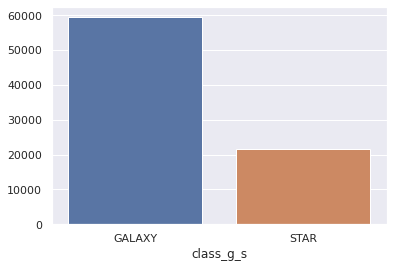

In [ ]:
sns.barplot(b.index,b.values)

In [ ]:
a = data[{"run_ID",'rerun_ID','cam_col','field_ID','fiber_ID','plate','MJD'}]
a

,cam_col,plate,MJD,rerun_ID,field_ID,run_ID,fiber_ID
0,2,5812,56354,301,79,3606,171
1,5,10445,58158,301,119,4518,427
2,2,4576,55592,301,120,3606,299
3,3,9149,58039,301,214,4192,775
4,3,6121,56187,301,137,8102,842
...,...,...,...,...,...,...,...
81034,2,9374,57749,301,581,7778,438
81035,1,7626,56934,301,289,7917,866
81036,4,2764,54535,301,308,5314,74
81037,4,6751,56368,301,131,3650,470


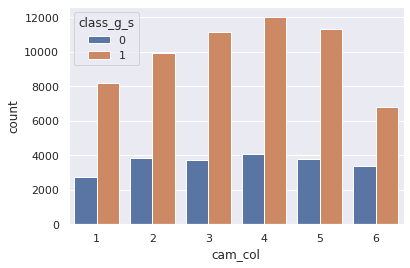

In [ ]:
sns.countplot(x=data["cam_col"],hue=data["class_g_s"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


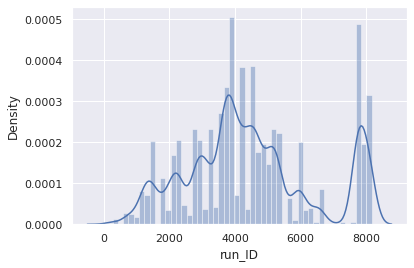

In [ ]:
sns.distplot(data.run_ID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


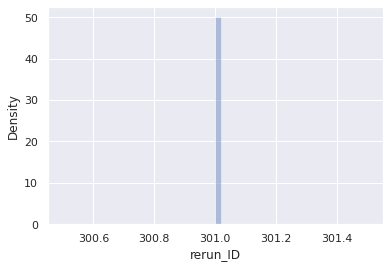

In [ ]:
sns.distplot(data.rerun_ID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


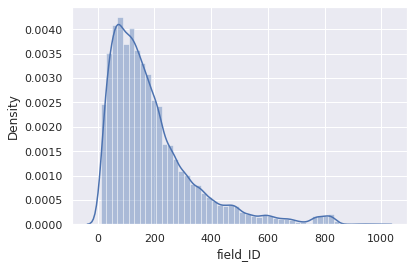

In [ ]:
sns.distplot(data.field_ID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


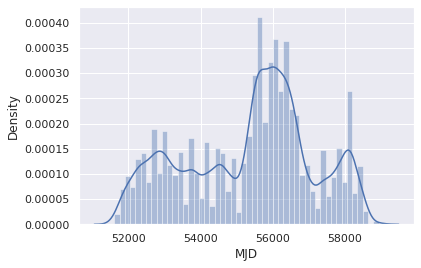

In [ ]:
sns.distplot(data.MJD)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


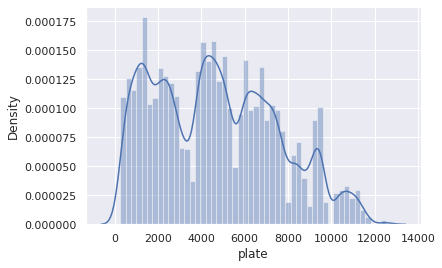

In [ ]:
sns.distplot(data.plate)

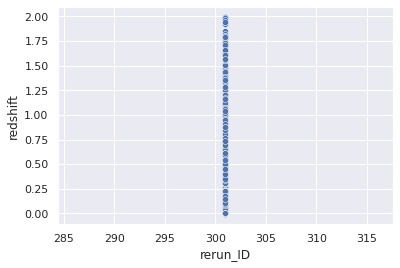

In [ ]:
sns.scatterplot(x='rerun_ID',y='redshift',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


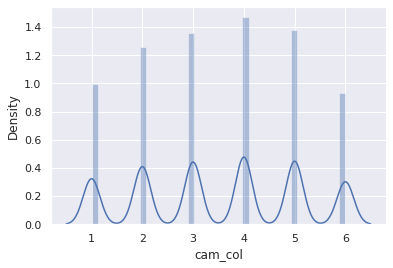

In [ ]:
sns.distplot(data.cam_col)

In [ ]:
b = data[{'obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'spec_obj_ID','redshift'}]
b

,i,obj_ID,u,delta,spec_obj_ID,g,r,z,alpha,redshift
0,19.16573,1.237661e+18,23.87882,32.494632,6.543777e+18,22.27530,20.39501,18.79371,135.689107,0.634794
1,21.16812,1.237665e+18,24.77759,31.274185,1.176014e+19,22.83188,22.58444,21.61427,144.826101,0.779136
2,19.34857,1.237661e+18,25.26307,35.582444,5.152200e+18,22.66389,20.60976,18.94827,142.188790,0.644195
3,20.50454,1.237663e+18,22.13682,-0.402828,1.030107e+19,23.77656,21.61162,19.25010,338.741038,0.932346
4,15.97711,1.237680e+18,19.43718,21.183866,6.891865e+18,17.58028,16.49747,15.54461,345.282593,0.116123
...,...,...,...,...,...,...,...,...,...,...
81034,21.30548,1.237679e+18,22.16759,-2.594074,1.055431e+19,22.97586,21.90404,20.73569,39.620709,0.000000
81035,19.75759,1.237679e+18,22.69118,19.798874,8.586351e+18,22.38628,20.45003,19.41526,29.493819,0.404895
81036,17.69034,1.237668e+18,21.16916,15.700707,3.112008e+18,19.26997,18.20428,17.35221,224.587407,0.143366
81037,19.07254,1.237661e+18,25.35039,46.660365,7.601080e+18,21.63757,19.91386,18.62482,212.268621,0.455040


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


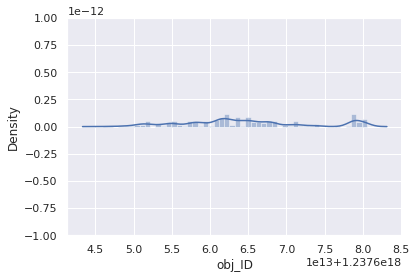

In [ ]:
sns.distplot(data.obj_ID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


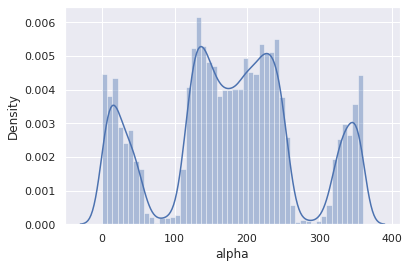

In [ ]:
sns.distplot(data.alpha)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


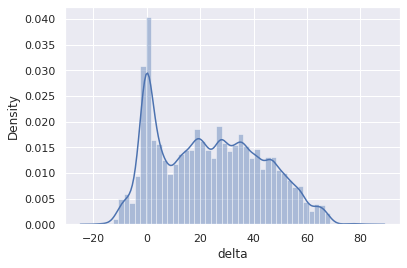

In [ ]:
sns.distplot(data.delta)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


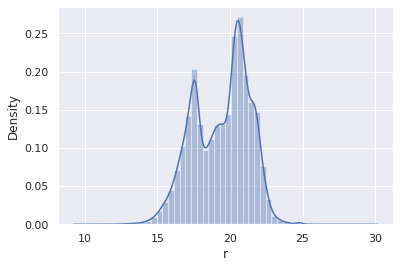

In [ ]:
sns.distplot(data.r)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


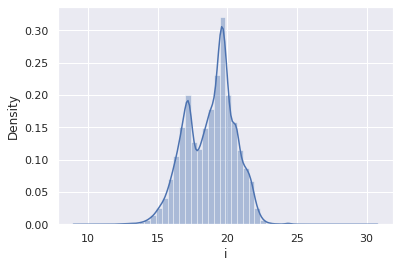

In [ ]:
sns.distplot(data.i)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


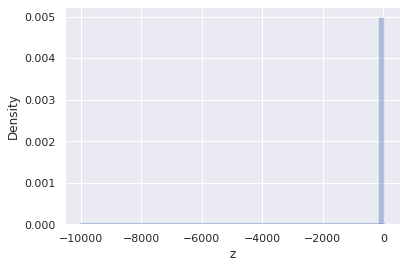

In [ ]:
sns.distplot(data.z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


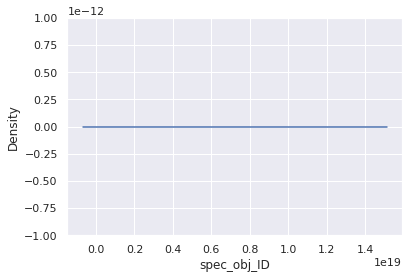

In [ ]:
sns.distplot(data.spec_obj_ID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


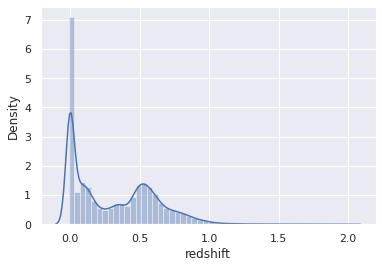

In [ ]:
sns.distplot(data.redshift)

In [ ]:
data.skew()

obj_ID           0.376814
alpha           -0.023738
delta            0.234054
u             -282.738575
g             -283.033653
r               -0.316863
i               -0.250460
z             -283.669464
run_ID           0.376794
rerun_ID         0.000000
cam_col         -0.038069
field_ID         1.780669
spec_obj_ID      0.344820
class_g_s       -1.056480
redshift         0.636947
plate            0.344829
MJD             -0.264386
fiber_ID         0.270038
dtype: float64

In [ ]:
data_wo_id = data[{'alpha','delta','u','g','r','i','z','redshift','plate','MJD','class_g_s'}]
data_wo_id

,MJD,i,g,u,delta,class_g_s,redshift,r,z,plate,alpha
0,56354,19.16573,22.27530,23.87882,32.494632,1,0.634794,20.39501,18.79371,5812,135.689107
1,58158,21.16812,22.83188,24.77759,31.274185,1,0.779136,22.58444,21.61427,10445,144.826101
2,55592,19.34857,22.66389,25.26307,35.582444,1,0.644195,20.60976,18.94827,4576,142.188790
3,58039,20.50454,23.77656,22.13682,-0.402828,1,0.932346,21.61162,19.25010,9149,338.741038
4,56187,15.97711,17.58028,19.43718,21.183866,1,0.116123,16.49747,15.54461,6121,345.282593
...,...,...,...,...,...,...,...,...,...,...,...
81034,57749,21.30548,22.97586,22.16759,-2.594074,1,0.000000,21.90404,20.73569,9374,39.620709
81035,56934,19.75759,22.38628,22.69118,19.798874,1,0.404895,20.45003,19.41526,7626,29.493819
81036,54535,17.69034,19.26997,21.16916,15.700707,1,0.143366,18.20428,17.35221,2764,224.587407
81037,56368,19.07254,21.63757,25.35039,46.660365,1,0.455040,19.91386,18.62482,6751,212.268621


# LOGISTIC REGRESSION

In [ ]:
x= data_wo_id.drop("class_g_s", axis=1)
y=data_wo_id["class_g_s"]
x.head

<bound method NDFrame.head of          MJD         i         g         u      delta  redshift         r  \
0      56354  19.16573  22.27530  23.87882  32.494632  0.634794  20.39501   
1      58158  21.16812  22.83188  24.77759  31.274185  0.779136  22.58444   
2      55592  19.34857  22.66389  25.26307  35.582444  0.644195  20.60976   
3      58039  20.50454  23.77656  22.13682  -0.402828  0.932346  21.61162   
4      56187  15.97711  17.58028  19.43718  21.183866  0.116123  16.49747   
...      ...       ...       ...       ...        ...       ...       ...   
81034  57749  21.30548  22.97586  22.16759  -2.594074  0.000000  21.90404   
81035  56934  19.75759  22.38628  22.69118  19.798874  0.404895  20.45003   
81036  54535  17.69034  19.26997  21.16916  15.700707  0.143366  18.20428   
81037  56368  19.07254  21.63757  25.35039  46.660365  0.455040  19.91386   
81038  57104  20.00959  21.79745  22.62171  49.464643  0.542944  20.60115   

              z  plate       alpha  
0      1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .60)

In [ ]:
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.0438828663261307

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.18787018756169793

In [ ]:
mean_squared_error(y_test,y_pred,squared=False)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8133329220138203

### CONFUSION MATRIX





In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 3965,  4657],
       [ 1394, 22400]])

# NEURAL NETWORKS

In [ ]:
x= data_wo_id.drop("class_g_s", axis=1)
y=data_wo_id["class_g_s"]
x.head

<bound method NDFrame.head of               u         z  plate    MJD         i  redshift         r  \
0      23.87882  18.79371   5812  56354  19.16573  0.634794  20.39501   
1      24.77759  21.61427  10445  58158  21.16812  0.779136  22.58444   
2      25.26307  18.94827   4576  55592  19.34857  0.644195  20.60976   
3      22.13682  19.25010   9149  58039  20.50454  0.932346  21.61162   
4      19.43718  15.54461   6121  56187  15.97711  0.116123  16.49747   
...         ...       ...    ...    ...       ...       ...       ...   
81034  22.16759  20.73569   9374  57749  21.30548  0.000000  21.90404   
81035  22.69118  19.41526   7626  56934  19.75759  0.404895  20.45003   
81036  21.16916  17.35221   2764  54535  17.69034  0.143366  18.20428   
81037  25.35039  18.62482   6751  56368  19.07254  0.455040  19.91386   
81038  22.62171  19.28075   7410  57104  20.00959  0.542944  20.60115   

            alpha      delta         g  
0      135.689107  32.494632  22.27530  
1      144.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test


36198    1
76457    0
8700     0
25768    1
2245     1
        ..
74481    1
19373    0
19490    0
44161    0
23686    0
Name: class_g_s, Length: 24312, dtype: int64

In [ ]:
tf.random.set_seed(42)
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP3: Fit the model

history = model.fit(x_test, y_test, epochs = 500, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


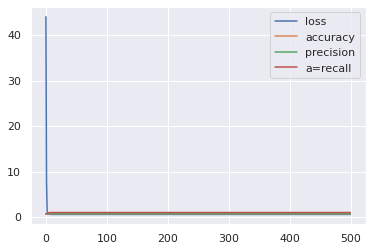

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

760/760 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.7347 - precision: 0.7347 - a=recall: 1.0000


[0.5785295963287354, 0.7346988916397095, 0.7346988916397095, 1.0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test


36198    1
76457    0
8700     0
25768    1
2245     1
        ..
26604    0
32781    0
15253    1
65949    0
80734    0
Name: class_g_s, Length: 32416, dtype: int64

In [ ]:
tf.random.set_seed(42)
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(9, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP3: Fit the model

history = model.fit(x_test, y_test, epochs = 100, verbose = 0)

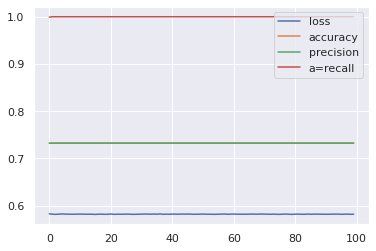

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

1013/1013 [==============================] - 2s 1ms/step - loss: 0.5811 - accuracy: 0.7324 - precision: 0.7324 - a=recall: 1.0000


[0.581149160861969, 0.7323852181434631, 0.7323852181434631, 1.0]

# BAGGING

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bgclassifier = BaggingClassifier(base_estimator=None, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(x_train, y_train)

BaggingClassifier(max_features=10, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

In [ ]:
print('Model test Score: %.3f, ' %bgclassifier.score(x_test, y_test), 'Model training Score: %.3f' %bgclassifier.score(x_train, y_train))

Model test Score: 0.993,  Model training Score: 0.992


# BOOSTING

##ADABOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.6)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9983650049358341


##GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.6,max_depth=1,
 random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9988277393879565

##EXTREME GRADIENT BOOSTING

In [ ]:
from xgboost import XGBClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier()

In [ ]:
score = xgb_clf.score(x_test, y_test)
print(score)

0.9990621915103652
